__Import well data and data analysis python libraries__ 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
welldf=pd.read_csv('Well_58-32.csv')

In [3]:
welldf.head()

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
0,85.18,25.96,56.80,17.31,0.0,0.0,93.49,34.16,90.87,32.71,...,61.57,151.09,1109.58,4200.22,101.61,-1230.69,-8485.61,-0.01,-0.03,0.31
1,86.18,26.27,61.14,18.63,0.0,0.0,93.52,34.18,90.83,32.68,...,61.57,151.09,1108.36,4195.60,101.70,-1230.69,-8485.61,-0.01,-0.04,0.31
2,87.23,26.59,18.58,5.66,0.0,0.0,94.25,34.58,90.91,32.73,...,62.12,61.54,1102.87,4174.82,96.81,-1230.69,-8485.61,-0.01,-0.03,0.30
3,88.26,26.90,38.29,11.67,0.0,0.0,94.44,34.69,91.14,32.86,...,61.85,60.23,1101.04,4167.89,96.67,-1230.69,-8485.61,0.00,-0.03,0.31
4,89.36,27.24,394.38,120.20,0.0,0.0,94.48,34.71,91.18,32.88,...,61.85,61.75,1102.46,4173.26,96.63,-1230.69,-8485.61,-0.02,-0.02,0.31


In [ ]:
welldf.describe().transpose()

In [ ]:
welldf.describe().transpose().to_csv('decription.csv', sep=',')

In [4]:
welldf.columns

Index(['Depth(ft)', 'Depth(m)', 'ROP(1 ft)', 'ROP(1 m)',
       'weight on bit (k-lbs)', 'weight on bit (kg)', 'Temp Out( degF)',
       'Temp Out( degC)', 'Temp In(degF)', 'Temp In(degC)', 'Pit Total (bbls)',
       'Pit Total (m3)', 'Pump Press (psi)', 'Pump Press (KPa)',
       'Hookload (k-lbs)', 'Hookload (kg)', 'Surface Torque (psi)',
       'Surface Torque (KPa)', 'Rotary Speed (rpm)', 'Flow In (gal/min)',
       'Flow In(liters/min)', 'Flow Out %', 'WH Pressure (psi)',
       'WH Pressure (KPa)', 'H2S Floor', 'H2S Cellar', 'H2S Pits'],
      dtype='object')

In [3]:
df=welldf[['ROP(1 m)','Depth(m)','weight on bit (kg)','Rotary Speed (rpm)','Pump Press (KPa)','Temp In(degC)',
        'Flow In(liters/min)','Flow Out %']]

__Exploratory data analysis__

In [ ]:
#cheking for missing values 
#luckily in this drilling dataset there is no missing values
df.isnull().sum()

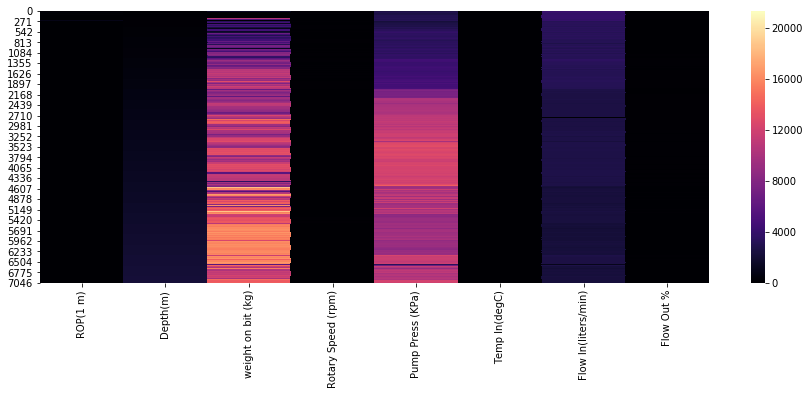

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(data=df,cmap='magma')

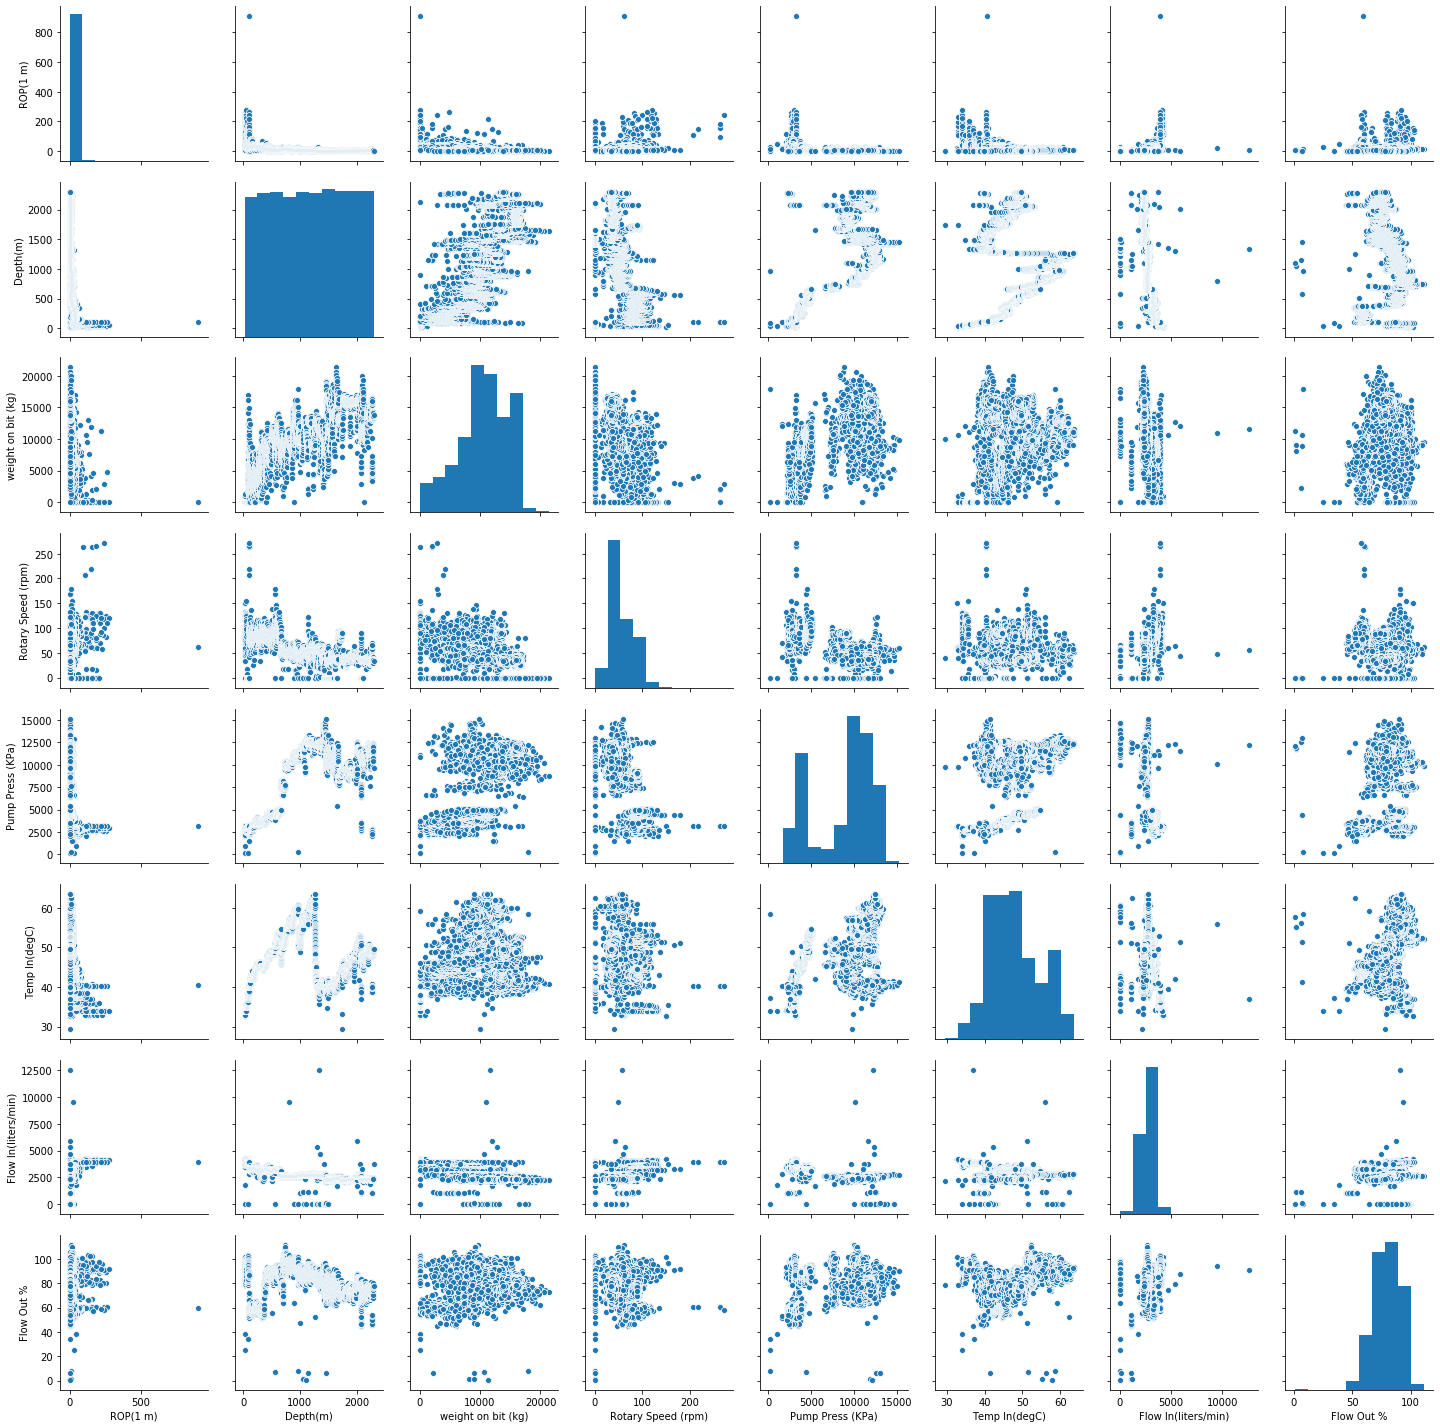

In [17]:
#cheking for corrolation between features and outliers
sns.pairplot(df)

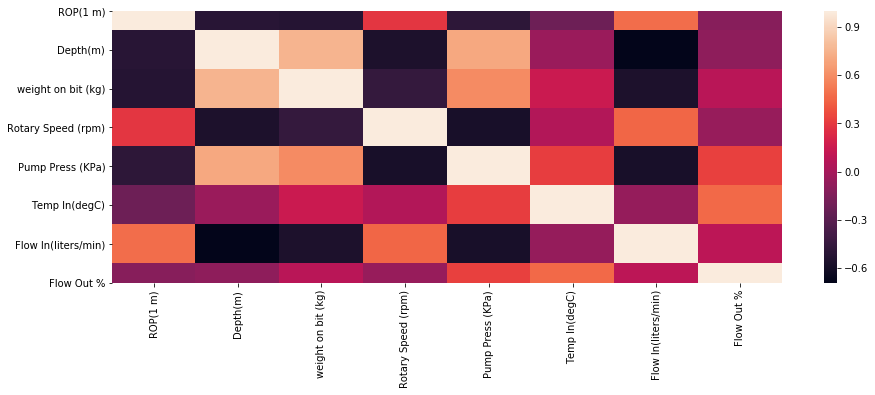

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr())

In [20]:
#which are the most corrolated features with our target variable ROP
df.corr()['ROP(1 m)'].sort_values

<bound method Series.sort_values of ROP(1 m)               1.000000
Depth(m)              -0.508247
weight on bit (kg)    -0.523441
Rotary Speed (rpm)     0.289070
Pump Press (KPa)      -0.493190
Temp In(degC)         -0.221713
Flow In(liters/min)    0.481607
Flow Out %            -0.116068
Name: ROP(1 m), dtype: float64>

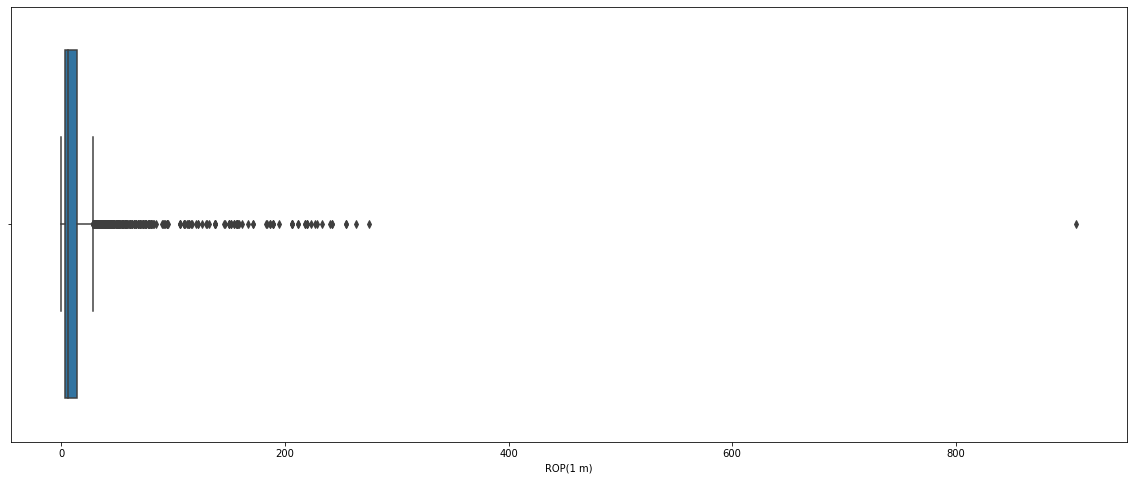

In [21]:
#Outlier removal 
plt.figure(figsize=(20,8))
sns.boxplot(df['ROP(1 m)'])

In [22]:
df[df['ROP(1 m)'] > 800]

,ROP(1 m),Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %
259,907.62,110.29,0.0,62.71,3181.56,40.58,3954.13,59.62


In [5]:
df=df.drop(index=259,axis=0)

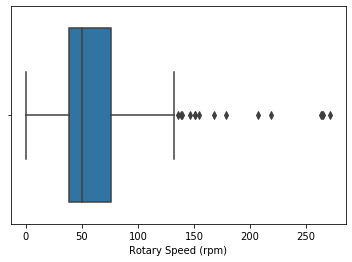

In [24]:
sns.boxplot(df['Rotary Speed (rpm)'])

In [25]:
df[df['Rotary Speed (rpm)'] > 200]

,ROP(1 m),Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %
245,110.12,105.68,3818.59,207.23,3202.59,40.35,3958.78,60.35
246,151.41,106.02,4131.52,218.25,3165.77,40.35,3957.23,60.38
247,94.36,106.33,0.00,263.26,3199.97,40.33,3949.47,60.27
248,158.00,106.66,1986.39,263.84,3205.21,40.33,3968.09,60.59
249,184.34,106.96,2022.68,264.94,3194.73,40.31,3968.06,60.38
252,242.27,107.95,2852.61,271.58,3186.80,40.29,3948.71,57.57


In [6]:
df=df.drop(index=[245,246,247,248,249,252],axis=0)

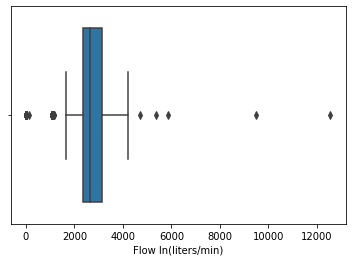

In [27]:
sns.boxplot(df['Flow In(liters/min)'])

In [28]:
df[df['Flow In(liters/min)'] > 7000]

,ROP(1 m),Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %
2462,21.9,802.30,10934.24,48.49,10090.97,55.90,9493.01,93.86
4152,4.0,1329.68,11646.26,56.60,12235.52,36.88,12558.14,90.74


In [7]:
df=df.drop(index=[2462,4152],axis=0)

In [30]:
df[df['Flow In(liters/min)'] > 5000]

,ROP(1 m),Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %
4052,5.83,1297.72,12748.30,64.26,12287.72,42.11,5366.01,78.89
6360,2.28,2004.57,12054.42,43.82,11601.39,51.32,5864.13,87.11


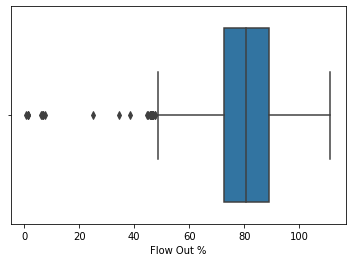

In [31]:
sns.boxplot(df['Flow Out %'])

In [32]:
df[df['Flow Out %'] < 10 ]

,ROP(1 m),Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %
1720,13.45,567.70,10707.48,0.0,4392.12,51.43,0.00,6.88
1721,13.45,567.70,10707.48,0.0,4395.63,51.43,0.00,6.88
2998,12.19,971.41,17909.30,0.0,215.61,58.53,0.00,7.75
3260,4.27,1051.39,9070.29,0.0,11864.71,55.20,1136.30,1.54
3261,4.28,1051.76,8163.27,0.0,11811.34,55.20,1143.65,1.54
3262,6.87,1052.12,9070.29,0.0,11826.92,55.20,1147.70,1.49
3411,5.49,1099.36,11337.87,0.0,12075.77,57.68,0.00,0.69
3572,3.05,1148.38,2267.57,0.0,12583.38,56.24,1118.55,6.19
4561,3.05,1453.61,8961.45,0.0,13032.79,41.33,140.10,6.58


In [8]:
df=df.drop(index=[1720,1721,2998,3260,3261,3262,3411,3572,4561],axis=0)

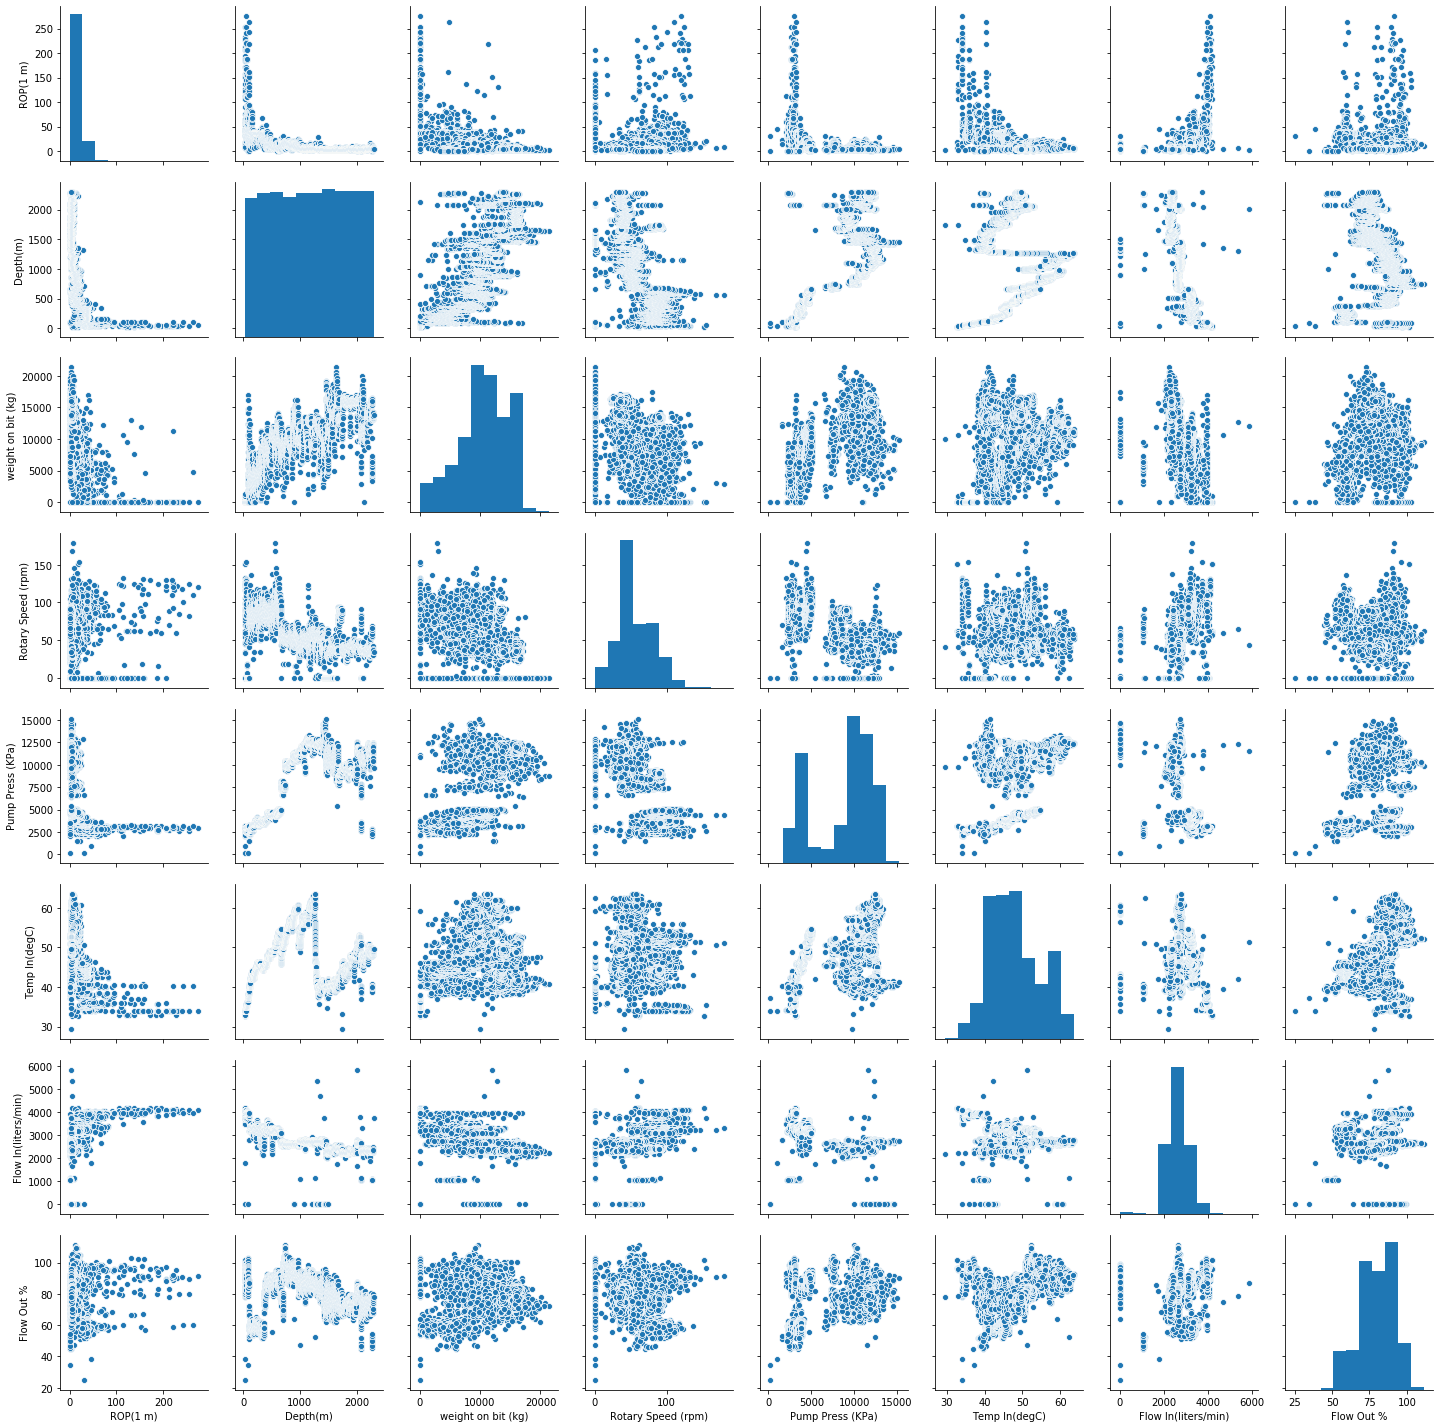

In [9]:
#checking the data after outlier removal
sns.pairplot(df)

In [ ]:
df.describe()

In [ ]:
#saving backup after outlier removal
df.to_csv('well_without_outlier.csv',index=False)

__import Scikit-learn libraries__

In [10]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [11]:
#create our depandent and independant variables
y=df['ROP(1 m)']
X=df.drop(['ROP(1 m)'],axis=1)


In [12]:
#check the dimensions
print('the dataframe dimension is :',df.shape)
print('Y dimension is :',y.shape)
print('X  dimension is :',X.shape)


the dataframe dimension is : (7293, 8)
Y dimension is : (7293,)
X  dimension is : (7293, 7)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [15]:
rfran=RandomForestRegressor()

In [16]:
#random try of random forest on the training set
rfran.fit(X_train,y_train)

c:\users\arbi ben aoun\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [17]:
predict=rfran.predict(X_test)

In [18]:
mse=mean_squared_error(y_test,predict)
print('the test set mean squared error is {}'.format(mse))

the test set mean squared error is 71.03159951188299


In [19]:
importance=pd.Series(data=rfran.feature_importances_,index=X.columns)

In [20]:
sorted_importance=importance.sort_values(ascending=True)

Text(0, 0.5, 'Feature name')

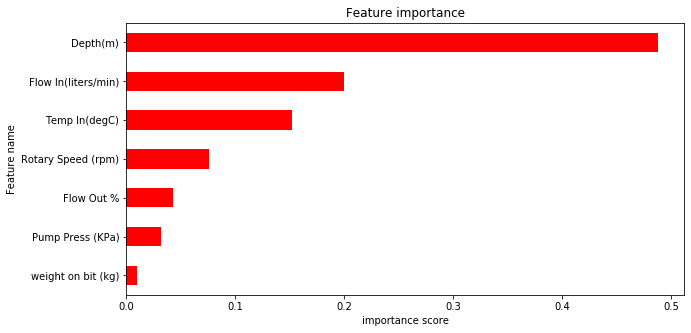

In [21]:
#feature importance based on giny impurity
plt.figure(figsize=(10,5))
sorted_importance.plot(kind='barh',color='red')
plt.title('Feature importance') 
plt.xlabel('importance score') 
plt.ylabel('Feature name')

In [22]:
cumsortimp=np.cumsum(sorted_importance.sort_values(ascending=False))

Text(0, 0.5, 'Feature name')

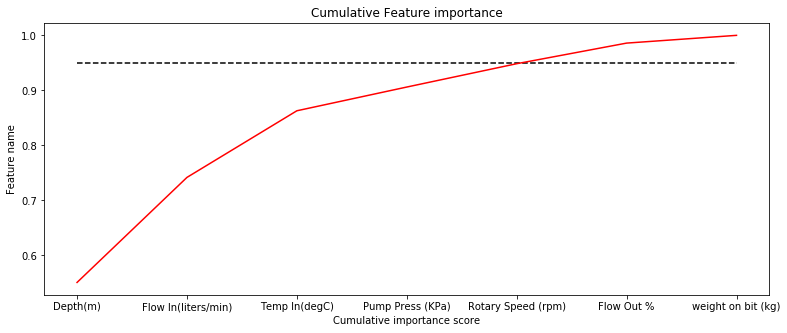

In [49]:
plt.figure(figsize=(13,5))
plt.plot(cumsortimp.index,cumsortimp[:],color='red')
plt.hlines(y=0.95,xmin=cumsortimp.index[0],xmax=cumsortimp.index[-1],linestyles='dashed')
plt.title('Cumulative Feature importance') 
plt.xlabel('Cumulative importance score') 
plt.ylabel('Feature name')

In [24]:
#Based on my drilling engineering knowledge ,weight on bit and pump pressure are important drilling parameters ,
#eventhough they are shown least importance based on giniy impurity , but we can remove flowout feature  
important_features=cumsortimp.drop(labels='Flow Out %')

In [25]:
important_X_train = X_train[important_features.index]
important_X_test=X_test[important_features.index]
print('when considering only important features the training data set dimension is {}'.format(important_X_train.shape))
print('when considering only important features the test dataset dimension is {}'.format(important_X_test.shape))

when considering only important features the training data set dimension is (5105, 6)
when considering only important features the test dataset dimension is (2188, 6)


__Scaling training data__

In [26]:
#we apply min-max normalization for the features
Xscale=MinMaxScaler().fit(important_X_train)
scaled_Xtrain=Xscale.transform(important_X_train)
scaled_Xtest=Xscale.transform(important_X_test)

__Random forest regression__

In [41]:
rf=RandomForestRegressor()

In [50]:
rfparam={'n_estimators':[300,400],'max_depth':[5,10,None]}

In [51]:
gridrf=GridSearchCV(estimator=rf,param_grid=rfparam,cv=5,verbose=3,scoring='neg_mean_absolute_error')

In [52]:
#use only important features selected by Gini impurity
#hyperparameter tuning using gridsearchCV
gridrf.fit(scaled_Xtrain,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=5, n_estimators=300 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=5, n_estimators=300, score=-3.365, total=   2.1s
[CV] max_depth=5, n_estimators=300 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ...... max_depth=5, n_estimators=300, score=-3.157, total=   2.2s
[CV] max_depth=5, n_estimators=300 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV] ...... max_depth=5, n_estimators=300, score=-3.203, total=   2.1s
[CV] max_depth=5, n_estimators=300 ...................................
[CV] ...... max_depth=5, n_estimators=300, score=-2.743, total=   2.0s
[CV] max_depth=5, n_estimators=300 ...................................
[CV] ...... max_depth=5, n_estimators=300, score=-3.281, total=   2.0s
[CV] max_depth=5, n_estimators=400 ...................................
[CV] ...... max_depth=5, n_estimators=400, score=-3.378, total=   2.7s
[CV] max_depth=5, n_estimators=400 ...................................
[CV] ...... max_depth=5, n_estimators=400, score=-3.161, total=   2.7s
[CV] max_depth=5, n_estimators=400 ...................................
[CV] ...... max_depth=5, n_estimators=400, score=-3.180, total=   2.7s
[CV] max_depth=5, n_estimators=400 ...................................
[CV] ...... max_depth=5, n_estimators=400, score=-2.747, total=   2.7s
[CV] max_depth=5, n_estimators=400 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, None],
   

In [54]:
gridrf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [55]:
best_rf=gridrf.best_estimator_

In [56]:
predictedrf=best_rf.predict(scaled_Xtest)

In [57]:
print('root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_test,predictedrf))))
print('Mean absolute error is {}'.format(mean_absolute_error(y_test,predictedrf)))
print('R2 score is {}'.format(r2_score(y_test,predictedrf)))

root mean squared error is 8.45877170262511
Mean absolute error is 2.524557602071907
R2 score is 0.821856517941727


In [ ]:
plt.figure(figsize=(13,6))
plt.title('Mean absolute error is {} and R2 score is {}'.format(mean_absolute_error(y_test,predictedrf),r2_score(y_test,predictedrf)))
plt.plot(np.arange(0,300,1),np.arange(0,300,1),color='green', linestyle='dashed',label='Predicted R.O.P = True R.O.P')
sns.scatterplot(x=y_test,y=predictedrf)
plt.xlabel('True R.O.P')
plt.ylabel('Predicted')

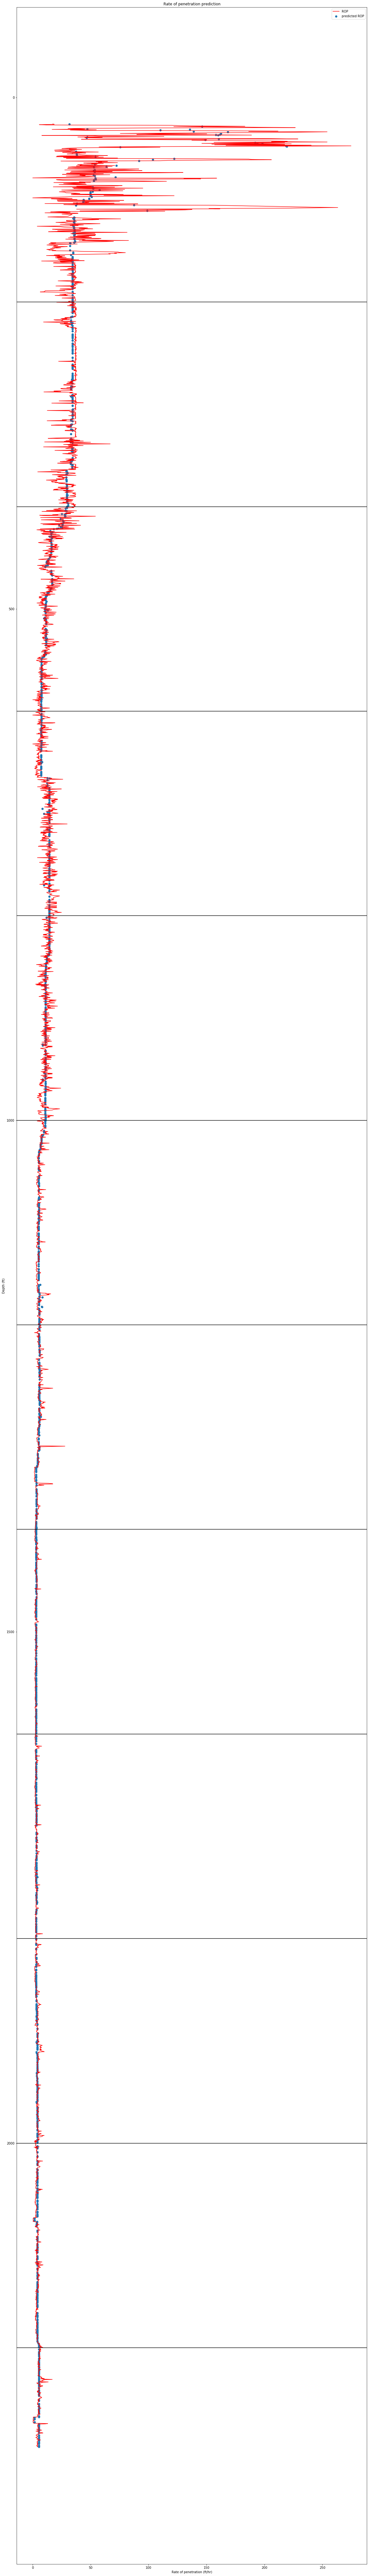

In [49]:
fig,ax=plt.subplots(figsize=(15,25))
ax.plot(y,X['Depth(m)'].values.reshape(-1,1),'r',label='ROP')
ax.scatter(predictedrf,X_test['Depth(m)'].values.reshape(-1,1),label='predicted ROP')
ay=plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)')
plt.xlabel('Rate of penetration (m/hr)')
plt.title('Rate of penetration prediction');
plt.legend(loc="best")
depth=[depth for depth in range(200,2400,200) ]
for i in range(len(depth)):
    plt.axhline(depth[i],color='black' )
    
 #plt.savefig('Random forest resgression.png') 



__support Vector machine regression__

In [62]:
# we try support vector machine regression
Sv_regressor=SVR()

In [63]:
svrparam={'gamma':['scale','auto'],'C':[0.01,0.1,1,100,100],'epsilon':[0.1,0.2,0.3]}

In [64]:
gridsvr=GridSearchCV(estimator=Sv_regressor,param_grid=svrparam,cv=5,verbose=2,scoring='neg_mean_absolute_error')

In [65]:
gridsvr.fit(scaled_Xtrain,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.01, epsilon=0.1, gamma=scale ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=0.01, epsilon=0.1, gamma=scale, total=   1.8s
[CV] C=0.01, epsilon=0.1, gamma=scale ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ................. C=0.01, epsilon=0.1, gamma=scale, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=scale ................................
[CV] ................. C=0.01, epsilon=0.1, gamma=scale, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=scale ................................
[CV] ................. C=0.01, epsilon=0.1, gamma=scale, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=scale ................................
[CV] ................. C=0.01, epsilon=0.1, gamma=scale, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=auto .................................
[CV] .................. C=0.01, epsilon=0.1, gamma=auto, total=   1.6s
[CV] C=0.01, epsilon=0.1, gamma=auto .................................
[CV] .................. C=0.01, epsilon=0.1, gamma=auto, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=auto .................................
[CV] .................. C=0.01, epsilon=0.1, gamma=auto, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=auto .................................
[CV] .

[CV] ................... C=0.1, epsilon=0.3, gamma=auto, total=   1.7s
[CV] C=1, epsilon=0.1, gamma=scale ...................................
[CV] .................... C=1, epsilon=0.1, gamma=scale, total=   1.4s
[CV] C=1, epsilon=0.1, gamma=scale ...................................
[CV] .................... C=1, epsilon=0.1, gamma=scale, total=   1.2s
[CV] C=1, epsilon=0.1, gamma=scale ...................................
[CV] .................... C=1, epsilon=0.1, gamma=scale, total=   1.2s
[CV] C=1, epsilon=0.1, gamma=scale ...................................
[CV] .................... C=1, epsilon=0.1, gamma=scale, total=   1.3s
[CV] C=1, epsilon=0.1, gamma=scale ...................................
[CV] .................... C=1, epsilon=0.1, gamma=scale, total=   1.3s
[CV] C=1, epsilon=0.1, gamma=auto ....................................
[CV] ..................... C=1, epsilon=0.1, gamma=auto, total=   1.3s
[CV] C=1, epsilon=0.1, gamma=auto ....................................
[CV] .

[CV] ................... C=100, epsilon=0.3, gamma=auto, total=   1.3s
[CV] C=100, epsilon=0.3, gamma=auto ..................................
[CV] ................... C=100, epsilon=0.3, gamma=auto, total=   1.3s
[CV] C=100, epsilon=0.3, gamma=auto ..................................
[CV] ................... C=100, epsilon=0.3, gamma=auto, total=   1.4s
[CV] C=100, epsilon=0.1, gamma=scale .................................
[CV] .................. C=100, epsilon=0.1, gamma=scale, total=   2.4s
[CV] C=100, epsilon=0.1, gamma=scale .................................
[CV] .................. C=100, epsilon=0.1, gamma=scale, total=   3.3s
[CV] C=100, epsilon=0.1, gamma=scale .................................
[CV] .................. C=100, epsilon=0.1, gamma=scale, total=   3.7s
[CV] C=100, epsilon=0.1, gamma=scale .................................
[CV] .................. C=100, epsilon=0.1, gamma=scale, total=   3.3s
[CV] C=100, epsilon=0.1, gamma=scale .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 100, 100],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': ['scale', 'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
best_Svr=gridsvr.best_estimator_

In [67]:
predictedsvr=best_Svr.predict(scaled_Xtest)

In [68]:
print('root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_test,predictedsvr))))
print('Mean absolute error is {}'.format(mean_absolute_error(y_test,predictedsvr)))
print('R2 score is {}'.format(r2_score(y_test,predictedsvr)))


root mean squared error is 10.713293478425806
Mean absolute error is 3.3480666269929458
R2 score is 0.7109861668760009


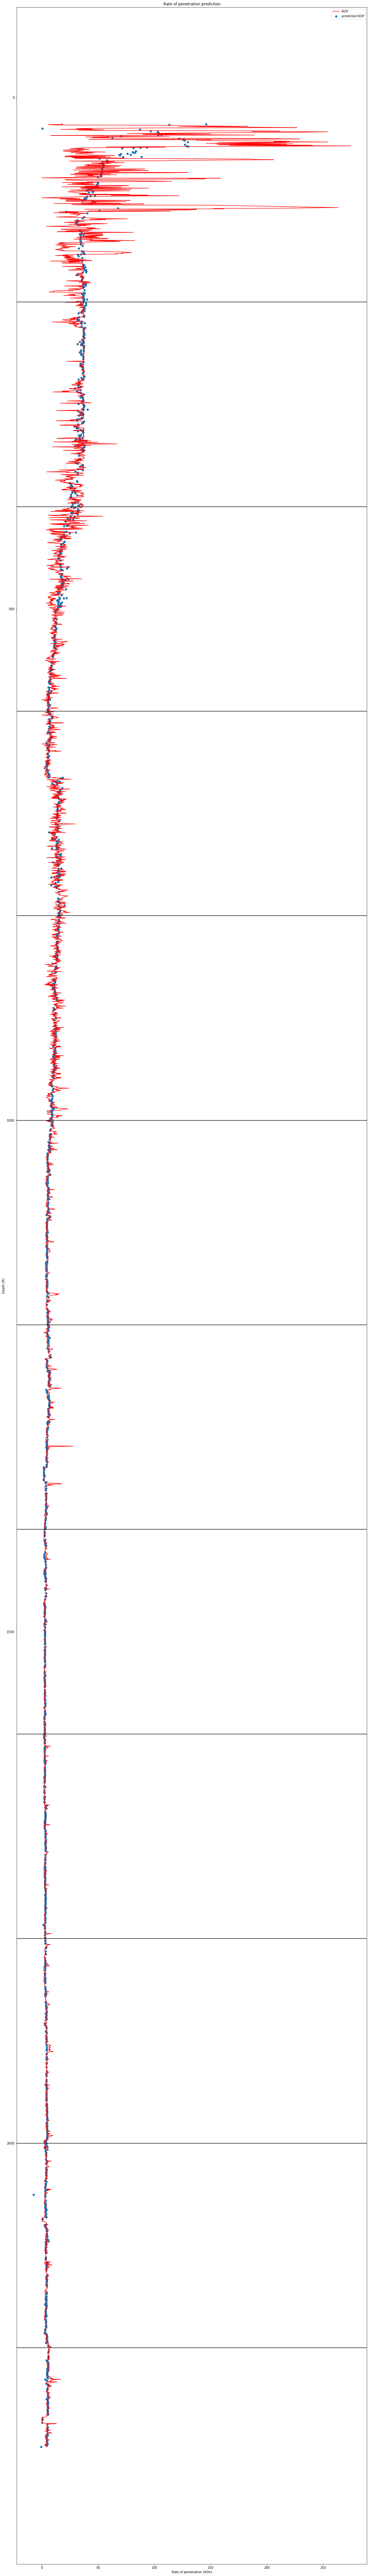

In [69]:
fig,ax=plt.subplots(figsize=(20,150))
ax.plot(y,X['Depth(m)'].values.reshape(-1,1),'r',label='ROP')
ax.scatter(predictedsvr,X_test['Depth(m)'].values.reshape(-1,1),label='predicted ROP')
ay=plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)')
plt.xlabel('Rate of penetration (m/hr)')
plt.title('Rate of penetration prediction');
plt.legend(loc="best")
depth=[depth for depth in range(200,2400,200) ]
for i in range(len(depth)):
    plt.axhline(depth[i],color='black' )
    
#plt.savefig('SVR resgression.png')    



__Final conclusion : 
Each of these previous regression models made was optimzed at it's best hyperparameters ,Randomforest regressor proved to be better in terms of performance, thus we need to validate this model to another on other well in the same field to see closer it's reliability ,the next step of my work is move deep learning and build artificial neural network__.
